In [1]:
import IPython
from CommonImports import *
from TopologySelectionAutomation import *

np.set_printoptions(threshold=sys.maxsize)
%matplotlib widget

In [2]:
#folder for saving data and images 
base = os.getcwd()
folder_results = '/home/mcash/Desktop/LoonDataCollab-main/Data'
folder_images = '/home/mcash/Desktop/LoonDataCollab-main/Images'

### Only increasing number of nodes in the network
##### num_nodes = 4, 6, 8, 10 L_k = 48

In [18]:
#import capacities matrix or work with reduced matrix
os.chdir(base)
num_nodes = 10 #!--change this number and re-run cells--! 
capacity = np.load('capacity_array.npy') 
capacities, flt_ids = pruneCapacity(num_nodes, capacity) 

In [19]:
print(capacities.shape)
print(flt_ids)

(23384, 10, 10)
['LN-172' 'LN-179' 'LN-180' 'LN-189' 'LN-193' 'LN-201' 'LN-207' 'LN-214'
 'LN-215' 'LN-250']


In [20]:
capacity = capacities[5000, :, :]
print(capacity)

[[  0. 390.   0. 588. 987. 195. 987. 390. 588.  98.]
 [390.   0.   0.  98. 588. 987. 588. 987. 390.   0.]
 [  0.   0.   0.  98.   0.   0.   0.   0.   0. 195.]
 [588.  98.  98.   0. 195.  98. 195.  98. 195. 390.]
 [987. 588.   0. 195.   0. 390. 987. 588. 588.  98.]
 [195. 987.   0.  98. 390.   0. 390. 987. 195.   0.]
 [987. 588.   0. 195. 987. 390.   0. 588. 588.  98.]
 [390. 987.   0.  98. 588. 987. 588.   0. 390.   0.]
 [588. 390.   0. 195. 588. 195. 588. 390.   0.  98.]
 [ 98.   0. 195. 390.  98.   0.  98.   0.  98.   0.]]


Run through time

In [21]:
source = np.where(flt_ids == 'LN-172')[0][0] + 1
dest = np.where(flt_ids == 'LN-207')[0][0] + 1 

T=2

rho_hist = np.zeros(capacities.shape[0],)
topo_hist = np.zeros((capacities.shape[0], num_nodes, num_nodes-1))
L_k = 48.0

start_time = time.time()
for i in range(0, capacities.shape[0]):
  
    rho, topology_vals = singleCommodityFlow(num_nodes, source, dest, L_k, T, capacities[i, :, :])
    rho_hist[i] = rho
    topo_hist[i] = topology_vals
    
    if i % 4000 == 0: 
        print('iteration = ', i)
        print('elpased time = ', time.time()-start_time)
print('finished')

#save results 
os.chdir(folder_results)
fname = 'rho_hist_SCF_numNodes_%s.npy' % num_nodes 
np.save(fname, rho_hist) 

iteration =  0
elpased time =  0.027960777282714844
iteration =  4000
elpased time =  348.92427825927734
iteration =  8000
elpased time =  469.1988248825073
iteration =  12000
elpased time =  516.8043303489685
iteration =  16000
elpased time =  557.6719934940338
iteration =  20000
elpased time =  594.8167746067047
finished


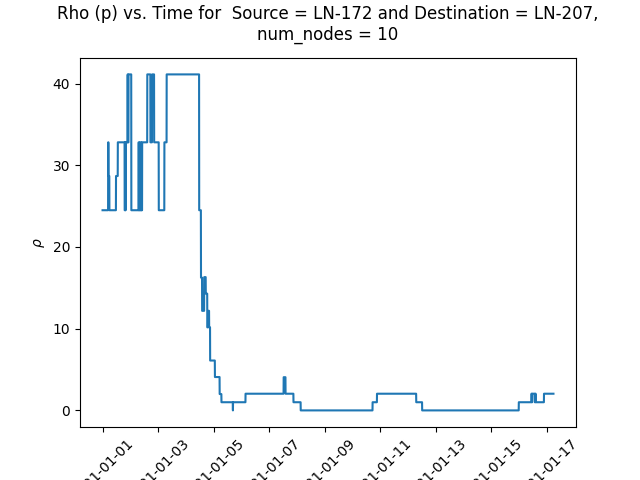

In [22]:
fname = 'Rho vs. Time Nodes = %s.png' % (num_nodes)
fig_title = 'Rho (p) vs. Time for  Source = %s and Destination = %s, num_nodes = %s' %(flt_ids[source-1], flt_ids[dest-1], num_nodes)

times = np.arange(np.datetime64('2021-01-01'),
                  np.datetime64('2021-01-18'), np.timedelta64(1, 'm'))

times = times[1:capacities.shape[0]+1]

fig, ax = plt.subplots()
ax.set_xlabel('Time (days)')
ax.set_ylabel(r"$\rho$")
ax.set_title(fig_title, pad=15, wrap=True)

ax.plot(times, rho_hist, label ='p')
ax.tick_params(axis='x', labelrotation = 45)
os.chdir(folder_images)
plt.savefig(fname, dpi = 300, bbox_inches='tight')

Import Results to Plot Without Re-Running Optimizer

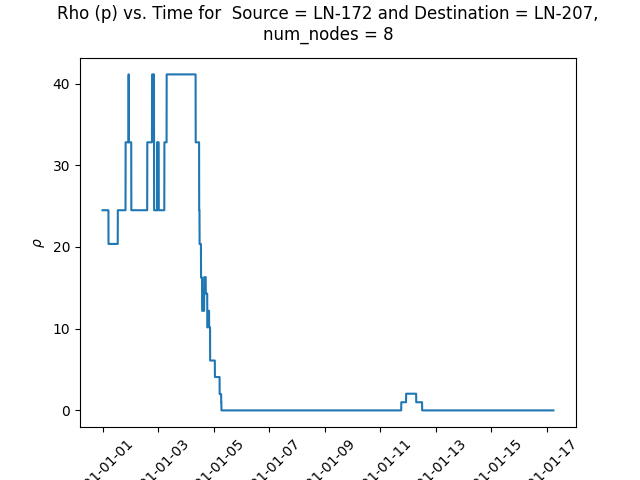

In [26]:
os.chdir(folder_results)
num_nodes = 8
fname = 'rho_hist_SCF_numNodes_%s.npy' % num_nodes 
rho_hist = np.load(fname)

times = np.arange(np.datetime64('2021-01-01'),
                  np.datetime64('2021-01-18'), np.timedelta64(1, 'm'))

times = times[1:capacities.shape[0]+1]

fig_title = 'Rho (p) vs. Time for  Source = %s and Destination = %s, num_nodes = %s' %(flt_ids[source-1], flt_ids[dest-1], num_nodes)

fig, ax = plt.subplots()
ax.set_xlabel('Time (days)')
ax.set_ylabel(r"$\rho$")
ax.set_title(fig_title, pad=15, wrap=True)

ax.plot(times, rho_hist, label ='p')
ax.tick_params(axis='x', labelrotation = 45)
plt.show()